In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

In [2]:
input_dir = os.getcwd()
input_file= os.path.join(input_dir, 'reportps.csv')
df = pd.read_csv(input_file,encoding = "ISO-8859-1")

In [3]:
df

,Close Date,Opportunity Name,Product Name,Quantity,Sales Price,Total Price,Product Code
0,7/1/2019,279932,Phospho-CDK4-T172 pAb,1.0,260.0,260.0,AP0593 - 100 ?l
1,7/1/2019,279932,[KO Validated] TRAF2 Polyclonal Antibody,1.0,328.0,164.0,A0962 - 100 ?l
2,7/1/2019,279932,DNMT3A Polyclonal Antibody,1.0,220.0,110.0,A3169 - 100 ?l
3,7/1/2019,279932,GSTZ1 Polyclonal Antibody,1.0,260.0,260.0,A6129 - 100 ?l
4,7/1/2019,279932,BMP6 Polyclonal Antibody,1.0,260.0,260.0,A8333 - 100 ?l
...,...,...,...,...,...,...,...
4814,12/24/2020,316046,WDR6 Polyclonal Antibody,1.0,220.0,110.0,A7780 - 100 ?l
4815,12/24/2020,316046,Albumin Polyclonal Antibody,1.0,220.0,110.0,A1363 - 100 ?l
4816,12/24/2020,316046,RAPGEF3 Polyclonal Antibody,1.0,220.0,110.0,A2199 - 100 ?l
4817,12/24/2020,316046,PCSK9 Polyclonal Antibody,1.0,220.0,110.0,A7860 - 100 ?l


In [4]:
df['Close Date'] = pd.to_datetime(df['Close Date'],infer_datetime_format=True)
df

,Close Date,Opportunity Name,Product Name,Quantity,Sales Price,Total Price,Product Code
0,2019-07-01,279932,Phospho-CDK4-T172 pAb,1.0,260.0,260.0,AP0593 - 100 ?l
1,2019-07-01,279932,[KO Validated] TRAF2 Polyclonal Antibody,1.0,328.0,164.0,A0962 - 100 ?l
2,2019-07-01,279932,DNMT3A Polyclonal Antibody,1.0,220.0,110.0,A3169 - 100 ?l
3,2019-07-01,279932,GSTZ1 Polyclonal Antibody,1.0,260.0,260.0,A6129 - 100 ?l
4,2019-07-01,279932,BMP6 Polyclonal Antibody,1.0,260.0,260.0,A8333 - 100 ?l
...,...,...,...,...,...,...,...
4814,2020-12-24,316046,WDR6 Polyclonal Antibody,1.0,220.0,110.0,A7780 - 100 ?l
4815,2020-12-24,316046,Albumin Polyclonal Antibody,1.0,220.0,110.0,A1363 - 100 ?l
4816,2020-12-24,316046,RAPGEF3 Polyclonal Antibody,1.0,220.0,110.0,A2199 - 100 ?l
4817,2020-12-24,316046,PCSK9 Polyclonal Antibody,1.0,220.0,110.0,A7860 - 100 ?l


In [5]:
df1 = df.groupby("Close Date")["Quantity"].sum()
df1 = df1.reset_index()
pd.set_option('display.max_rows',500)
df1.shape[0] 
"""
Total rows of data for each day since 2019/7/1 to 2020/12/31
"""

'\nTotal rows of data for each day since 2019/7/1 to 2020/12/31\n'

# Quantity Change vs Date

In [6]:
df1.to_csv("trend.csv")

In [7]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det

In [8]:
X=df1.loc[:,'Quantity']
x = X.tolist()
a,b = linreg(range(len(x)),x)
print(a,b)

0.04506791670462812 6.290289744949893


In [9]:
quantity = df.groupby("Close Date")["Quantity"].sum()


In [10]:
rev = df.groupby("Close Date")["Total Price"].sum()


In [11]:
result = pd.concat([quantity, rev], axis=1).reset_index()
result

,Close Date,Quantity,Total Price
0,2019-07-01,7.0,1424.00
1,2019-07-02,8.0,1330.00
2,2019-07-03,4.0,590.00
3,2019-07-05,1.0,110.00
4,2019-07-08,4.0,590.00
5,2019-07-09,2.0,370.00
6,2019-07-10,5.0,700.00
7,2019-07-11,8.0,880.00
8,2019-07-12,8.0,934.00
9,2019-07-15,2.0,370.00


In [23]:
result["Total Price"].sum()

691440.01

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = result.loc[:,'Quantity'] # Num of units that Free Sample Sent
y = result.loc[:,'Total Price']
X=np.array([X]).reshape(-1,1)

In [13]:
X.shape,y.shape

((373, 1), (373,))

In [14]:
lr=LinearRegression().fit(X,y)
y_pred=lr.predict(X)

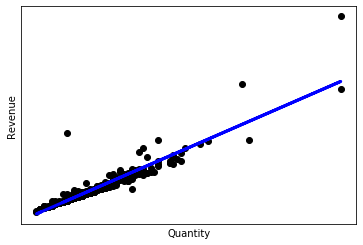

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.xlabel('Quantity')
plt.ylabel('Revenue')

plt.yticks(())

plt.show()

In [16]:
lr.coef_

array([146.74488189])

In [17]:
lr.intercept_

-299.449674558198

In [18]:
# Example of prediction
num = 1
num = np.array([num]).reshape(-1,1)
y_pred0 = lr.fit(X, y).predict(num)
y_pred0

array([-152.70479266])

In [19]:
r2_score(y, y_pred)

0.8687420498063138

In [20]:
coef = 146.74488189
inter = -299.449674558198
annual_sum = 0
data = []
for day in range(1,261):
    annual_day = 373+day
    result_quantity = round(annual_day * a + b)
    #print(result_quantity)
    
    prediction = round(result_quantity * coef + inter)
    data.append(prediction)   
    annual_sum += prediction
    
print(annual_sum) ### 50% as usual and the 2021 total will be below

1028003


In [24]:
increase_rate = (1028003 - 691440)/691440
increase_rate

0.4867566238574569

In [28]:
increase = 0.7 #required Increae rate
Goal = 691440 *(1+increase)
discount = 1-(Goal/(annual_sum *2)) #Discount precentage off
print("Discount is",round(discount,2))

Discount is 0.43
